In [1]:
import torch
import matplotlib.pyplot as plt
import kornia as K
import torchfields
from tqdm import tqdm
import torchvision.transforms.functional as F1
from torchvision.transforms import v2

from matplotlib import pyplot as plt
import torch.nn.functional as F
from utils import viewer_3d,show_mv,plt_images,complex_pyramid,complex_NLL,complex_total_variation

/Users/pi58/opt/anaconda3/envs/mri_recon/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/Users/pi58/opt/anaconda3/envs/mri_recon/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Pl

In [2]:

img_pos = torch.load('/Users/pi58/Library/CloudStorage/Box-Box/PhD/Low Field Data-1/20230213 - Chloe for Itamar/TSEV3_1_highGrad/img_pos.t')
img_inv = torch.load("/Users/pi58/Library/CloudStorage/Box-Box/PhD/Low Field Data-1/20230213 - Chloe for Itamar/TSEV3_1_highGrad/img_inv.t")
# img_inv = torch.flip(img_inv,[0])

In [4]:
f_pos = torch.fft.fftn(img_pos) #Converting to k-space
f_inv = torch.fft.fftn(img_inv)

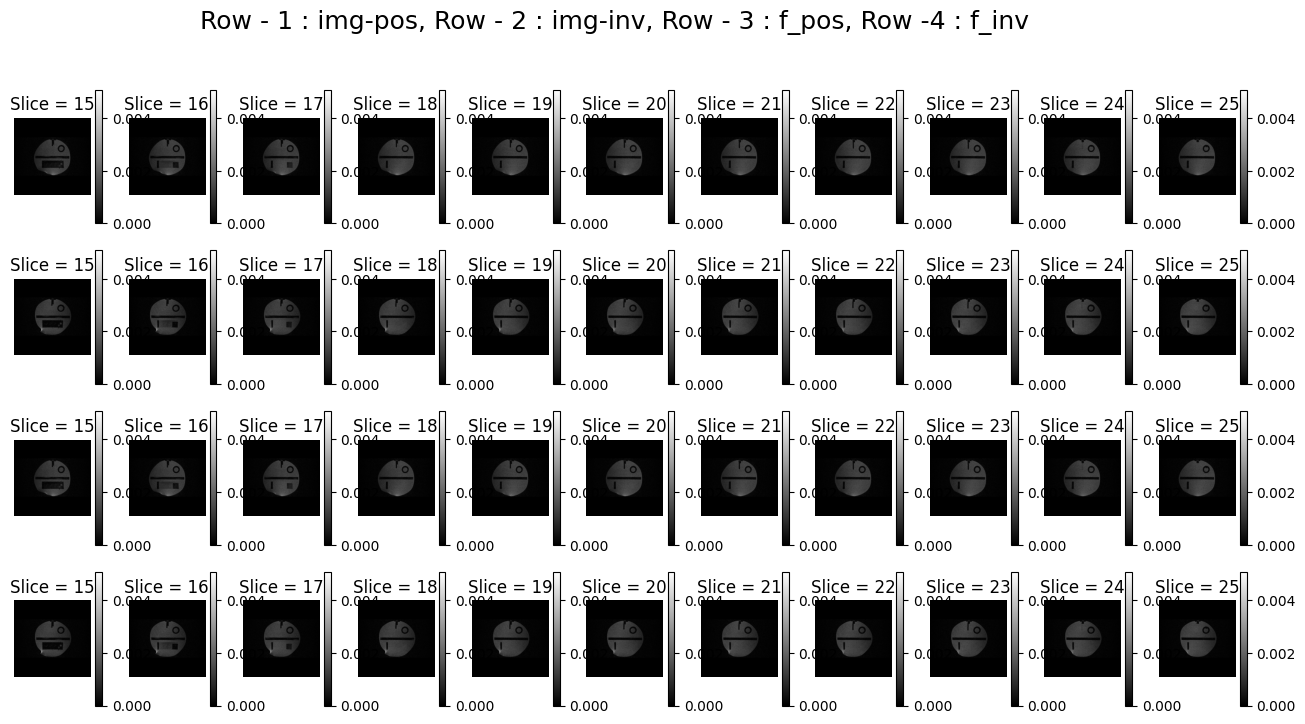

In [5]:
slices = [15,16,17,18,19,20,21,22,23,24,25]
z = [img_pos,img_inv,torch.abs(torch.fft.ifftn(f_pos)),torch.abs(torch.fft.ifftn(f_inv))]
plt_images(slices,z,"Row - 1 : img-pos, Row - 2 : img-inv, Row - 3 : f_pos, Row -4 : f_inv")

In [6]:
def forward_model_multi_resolution(w,template_img,brightness_factor):
    #W = Transformation matrix (Deformation matrix) (Warping matrix) (theta)
    ratio = brightness_factor
    img = template_img.reshape(1,template_img.shape[-3],template_img.shape[-1],template_img.shape[-1])
    #Warping
    img1 = w(img)
    img2 = torch.zeros_like(img1)
    # img = F1.adjust_brightness(img.reshape(-1,1,template_img.shape[-1],template_img.shape[-1]),brightness_factor).reshape(1,35,template_img.shape[-1],template_img.shape[-1])
    img = (ratio * img1 + (1.0 - ratio) * img2).clamp(0, 1).to(img1.dtype)  #Adjusting Brightness Factor
    #ift = torch.matmul(K,img())
    img = torch.fft.fftn(img)
    return img

In [8]:
template_img.shape

torch.Size([35, 220, 220])

In [23]:
def plt_images(slices_list, z,title):
  """

  :param slices_list: Ex : [10,11,12,13,14,15]
  :param z: The list that contains all tensors. Ex : To plot (img+,img-) -> z = [img_pos,img_inv]
  :return:
  """

  minmin = 0
  maxmax = 0.002
  slices = slices_list
  i = 0
  rows = len(z)
  cols = len(slices)
  f, ax = plt.subplots(rows, cols)
  f.set_figheight(8)
  f.set_figwidth(16)
  f.suptitle(title,fontsize=18)


  for r in range(rows):
    for c in range(cols):
      temp = z[r]
      slice_num = slices[i]
      temp = ax[r, c].imshow(temp[slice_num], cmap='gray',vmin=minmin,vmax=maxmax)
      ax[r, c].set_title("Slice = " + str(slice_num))
      ax[r, c].axis('off')

      # f.colorbar(temp)
      i += 1
    i = 0
  plt.show()

In [47]:
w = torch.ones((1,2,220,220), requires_grad=True) *0.1
w = w.field()
template_img = torch.tensor((img_pos+img_inv)/2,requires_grad=True)
brightness_factor = torch.ones(1, 1,requires_grad=True) 
list_dict = {}

/var/folders/jn/htj79lg12cg80r08kmc0y55h00z9nl/T/ipykernel_87579/2588282554.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  template_img = torch.tensor((img_pos+img_inv)/2,requires_grad=True)


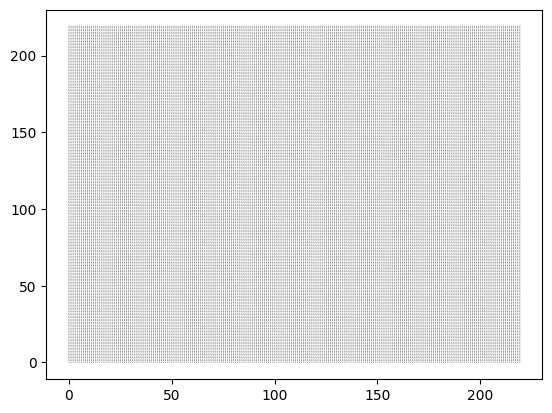

In [48]:
w = w.reshape(2,220,220).detach()
dx = w[0]
dy = w[1]
q = plt.quiver(dx,dy,cmap='gray')

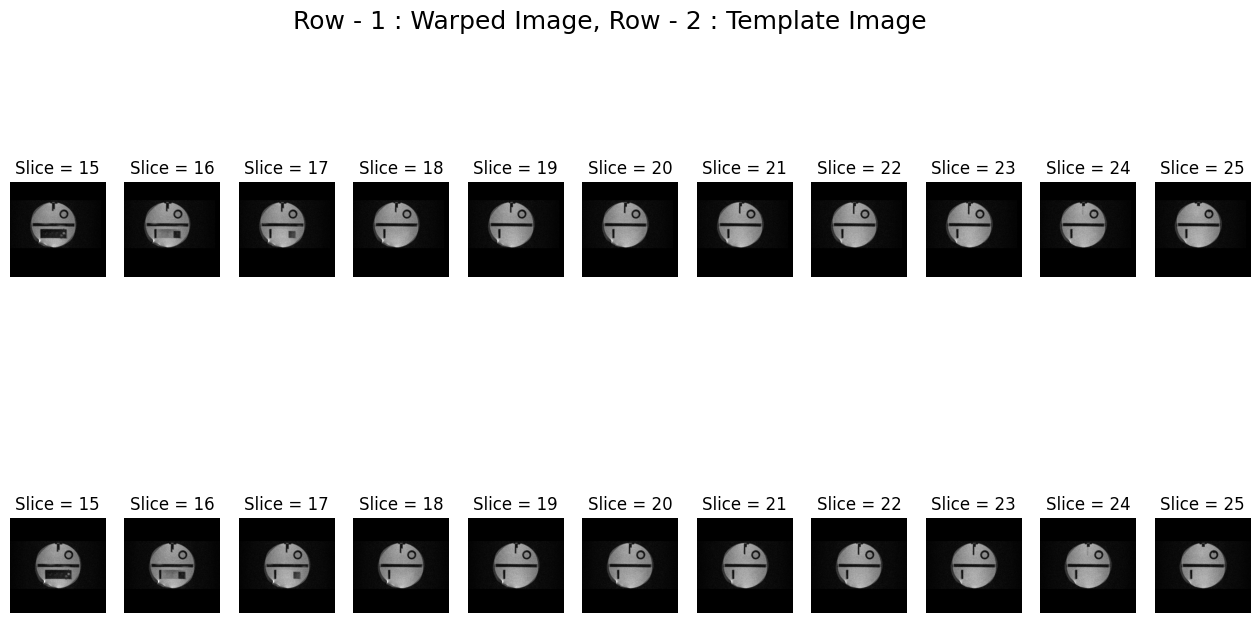

In [51]:
temp2 = w(template_img)
temp2 = temp2.reshape(35,220,220).detach()
z = [temp2, template_img.detach()]
plt_images(slices,z,"Row - 1 : Warped Image, Row - 2 : Template Image")

torch.Size([35, 220, 220])


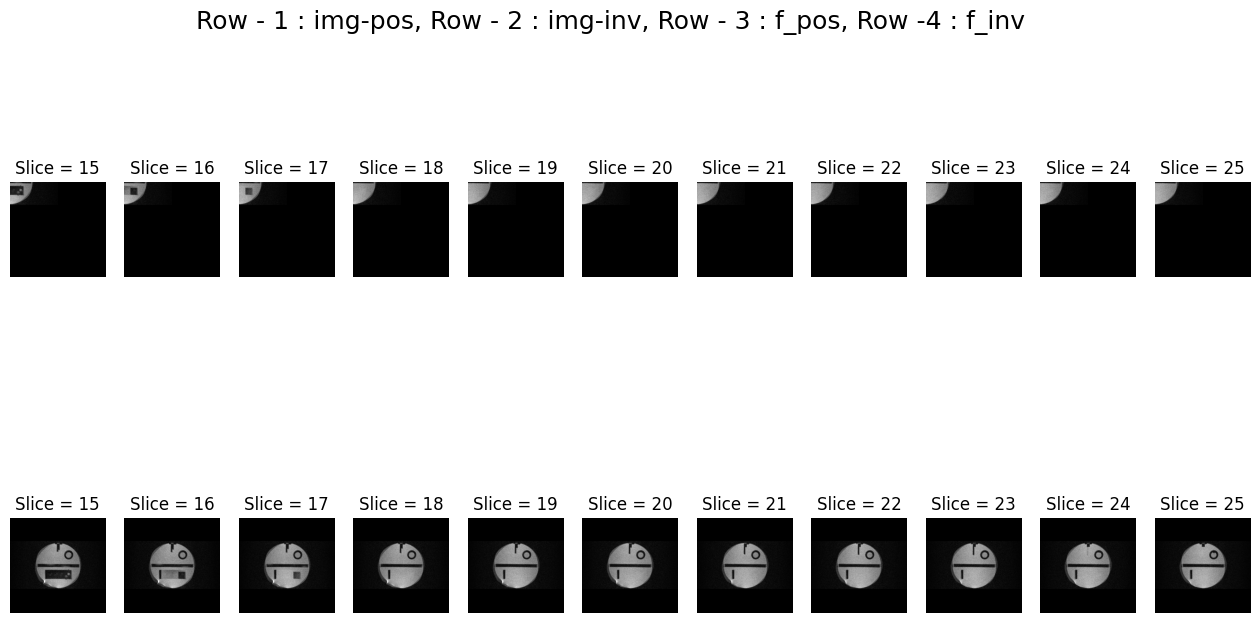

In [31]:
temp1 = forward_model_multi_resolution(w,template_img,brightness_factor)
temp1 = torch.abs(torch.fft.ifftn(temp1)).reshape(35,220,220).detach()
print(temp1.shape)
z = [temp1, template_img.detach()]
plt_images(slices,z,"Row - 1 : img-pos, Row - 2 : img-inv, Row - 3 : f_pos, Row -4 : f_inv")

In [ ]:
temp1 =
temp1 = torch.abs(torch.fft.ifftn(temp1)).reshape(35,220,220).detach()
print(temp1.shape)
z = [temp1, template_img.detach()]
plt_images(slices,z,"Row - 1 : img-pos, Row - 2 : img-inv, Row - 3 : f_pos, Row -4 : f_inv")